### HRRR 3d variables at model pressure levels

Examples for extracting variables at pressure levels! 
- "isobaricInhPa": variables at 40 pressure levels
- "atmosphere": entire atmosphere, max reflectivity

Date: Mar, 2021

In [4]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import cfgrib
import cf2cdm
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import xarray as xr
from datetime import datetime, timedelta
import urllib.request
from cfgrib.xarray_store import open_dataset
import warnings
import h5py

In [5]:
# merge HRRR dataset 
os.chdir('/data2/willytsai/InSAR_HRRR/HRRR_data/t02z/prs_levels/regrid_3km')
tmp = xr.open_dataset('hrrr.20180803.t02z.regrid3km.grib2',engine='cfgrib',backend_kwargs=dict(filter_by_keys={'typeOfLevel': 'atmosphere'}))
#ps_tmp = tmp.sp.sel(latitude=slice(axis_bound[0],axis_bound[1]),longitude=slice(axis_bound[2]+360,axis_bound[3]+360))

In [12]:
tmp.data_vars

Data variables:
    refc       (latitude, longitude) float32 ...
    veril      (latitude, longitude) float32 ...
    hail       (latitude, longitude) float32 ...
    ltng       (latitude, longitude) float32 ...
    tcc        (latitude, longitude) float32 ...
    paramId_0  (latitude, longitude) float32 ...

In [14]:
var3d = xr.open_dataset('hrrr.20180803.t02z.regrid3km.grib2',engine='cfgrib',
                        backend_kwargs=dict(filter_by_keys={'typeOfLevel': 'isobaricInhPa'}))

In [15]:
var3d.data_vars

Data variables:
    gh         (isobaricInhPa, latitude, longitude) float32 ...
    t          (isobaricInhPa, latitude, longitude) float32 ...
    r          (isobaricInhPa, latitude, longitude) float32 ...
    dpt        (isobaricInhPa, latitude, longitude) float32 ...
    q          (isobaricInhPa, latitude, longitude) float32 ...
    w          (isobaricInhPa, latitude, longitude) float32 ...
    u          (isobaricInhPa, latitude, longitude) float32 ...
    v          (isobaricInhPa, latitude, longitude) float32 ...
    absv       (isobaricInhPa, latitude, longitude) float32 ...
    clwmr      (isobaricInhPa, latitude, longitude) float32 ...
    paramId_0  (isobaricInhPa, latitude, longitude) float32 ...
    rwmr       (isobaricInhPa, latitude, longitude) float32 ...
    snmr       (isobaricInhPa, latitude, longitude) float32 ...
    grle       (isobaricInhPa, latitude, longitude) float32 ...

In [25]:
var3d.t.to_netcdf('/data2/willytsai/InSAR_HRRR/HRRR_data/t02z/prs_levels/HRRR_Ta_test.nc')

/home/willytsai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.


(37.0, 43.0)

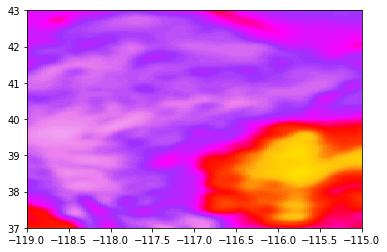

In [19]:
plt.pcolormesh(var3d.longitude-360,var3d.latitude,var3d.t[0,:,:],cmap='gist_ncar')
plt.xlim([-119,-115])
plt.ylim([37,43])

In [ ]:
from toolbox.cartopy_tools import common_features, pc, domain_border